In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random Forests

**Random Forest** is an **ensemble** of Decision Trees, trained via the **bagging** method.

The goal of **ensemble methods** is to combine the predictions of several classifiers.

<img src="ensemble.png" width=500 height=200 />

Once all classifiers are trained, the ensemble can make a prediction for a new instance by **aggregating** the predictions of all classifiers.

The ensemble **aggregates** the predictions of each classifier and predicts the class that gets the most votes.

<img src="aggregation.png" width=500 height=200 />

The decision trees are trained on different random subsets of the training set. 
When sampling is performed with replacement, this method is called **bagging** (short for bootstrap aggregating)

<img src="bagging.png" width=500 height=200 />

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

## Example 1

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, factor=0.1, noise=0.4)

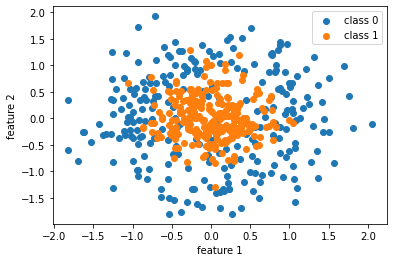

In [9]:
# plot the dataset: inner circle (class 1) + outer circle (class 0)
plt.scatter(X[y==0,0],X[y==0,1], label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], label='class 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Decision Tree with "unlimited" max_depth:

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_train_pred = tree_clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

In [18]:
y_test_pred = tree_clf.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.712

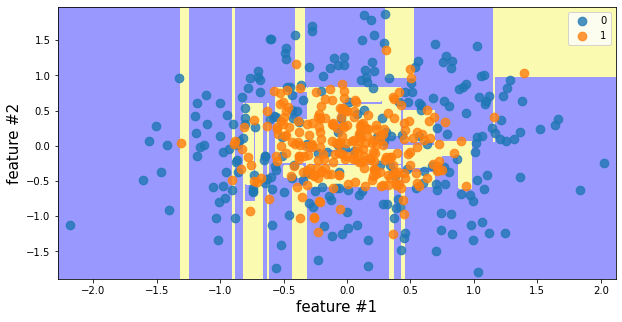

In [19]:
# visualize classification regions
draw_classification_regions(X, y, tree_clf) ## too complex (the tree has overfitted the data)

In [20]:
tree_clf.classes_

array([0, 1], dtype=int64)

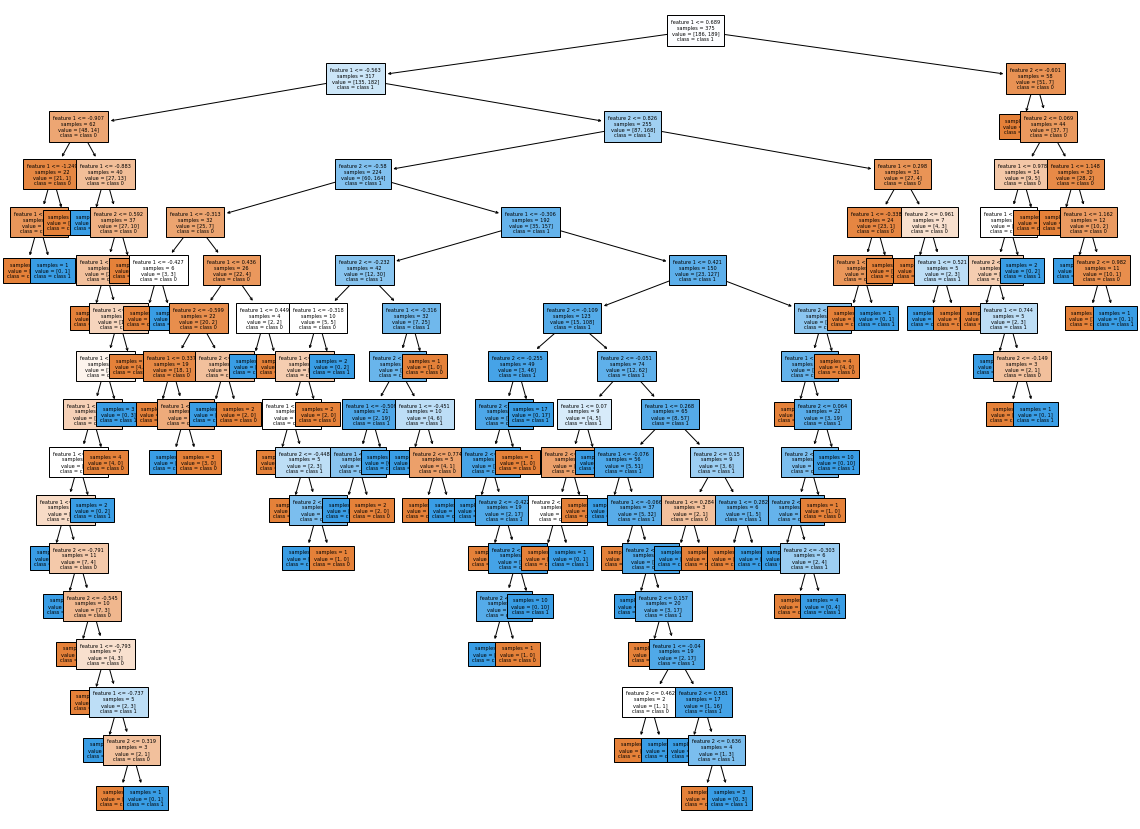

In [21]:
# visualize tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,15))

_ = plot_tree(tree_clf, feature_names=['feature 1','feature 2'], class_names =['class 0','class 1'], filled='True', impurity=False, fontsize=5)

### Decision Tree with  max_depth=2:

In [22]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [23]:
y_train_pred = tree_clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.712

In [24]:
y_test_pred = tree_clf.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.664

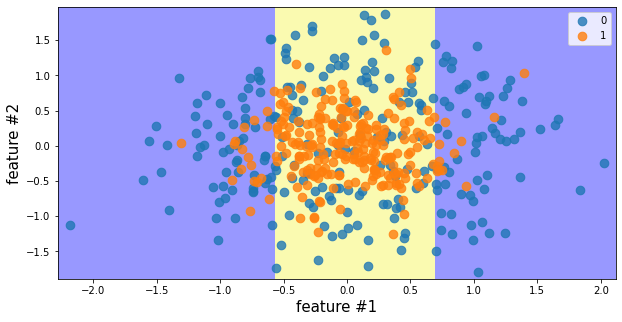

In [25]:
draw_classification_regions(X, y, tree_clf) # too simple 

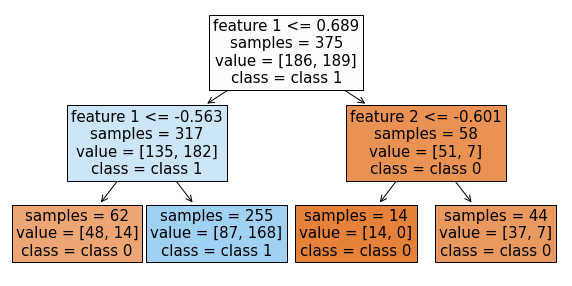

In [26]:
fig = plt.figure(figsize=(10,5))

_ = plot_tree(tree_clf, feature_names=['feature 1','feature 2'], class_names =['class 0','class 1'], filled='True', impurity=False, fontsize=15)

### Random Forest:

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=300, # number of trees
                                    max_depth = 2,  # max depth of the trees
                                    n_jobs = -1)  # use all your CPUs

In [28]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=300, n_jobs=-1)

In [29]:
y_train_pred = forest_clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.816

In [30]:
y_test_pred = forest_clf.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.712

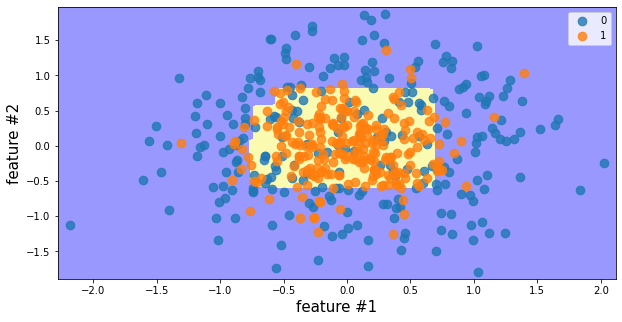

In [31]:
draw_classification_regions(X, y, forest_clf)

## Example 2

In [32]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.2)

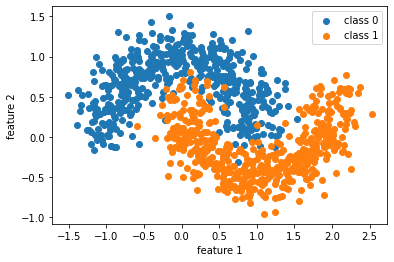

In [33]:
# plot the dataset: inner cirlce (class 1) + outer circle (class 0)
plt.scatter(X[y==0,0],X[y==0,1], label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], label='class 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Decision Tree with "unlimited" max_depth:

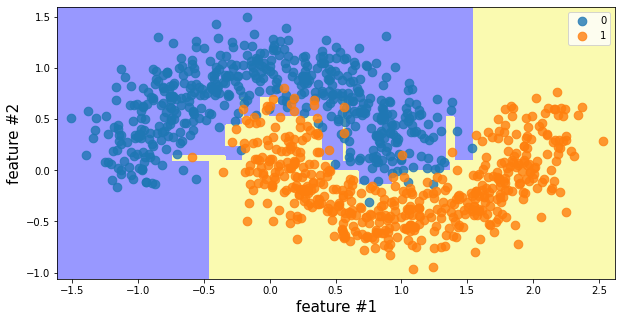

In [35]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
draw_classification_regions(X, y, tree_clf)

### Decision Tree with max_depth=2

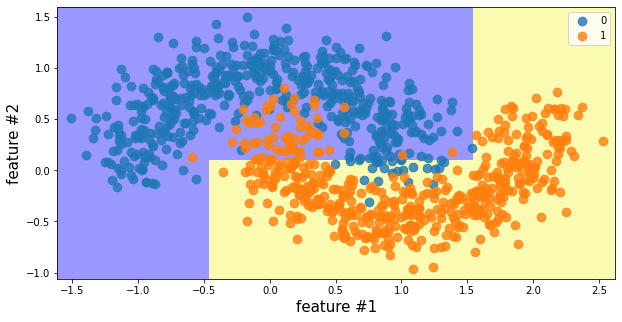

In [36]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train,y_train)
draw_classification_regions(X, y, tree_clf)

### Random Forest

In [37]:
forest_clf = RandomForestClassifier(n_estimators=200, # number of trees
                                    max_depth = 5,  # max depth of the trees
                                    n_jobs = -1)  # use all your CPUs
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

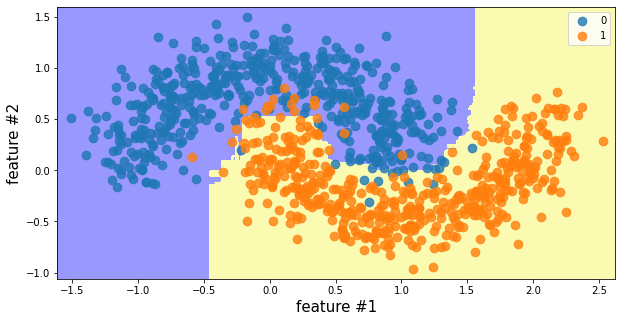

In [38]:
draw_classification_regions(X, y, forest_clf)

Random Forests have other hyperparameters that restric the complexity of their trees:
- `min_samples_split` (The minimum number of samples required to split an internal node)
- `min_samples_leaf` (The minimum number of samples required to be at a leaf node.)
- `max_leaf_nodes` (the maximum number of leaf nodes)
- `max_features` (the maximum number of features that are evaluated for splitting at each node)

## Random Forest Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# load iris data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris.species

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [43]:
forest_clf = RandomForestClassifier(n_jobs=-1)

In [44]:
# some parameters you might want to try:
parameters = {"min_samples_leaf" : [1, 4,  8], # default 1
              "min_samples_split" : [2, 4, 8], # default 2
              "n_estimators" : [10, 25, 50, 100, 150], # default 100
              "max_depth" : [2,5,10,15,20]} # default None (unlimited)

grid = GridSearchCV(forest_clf, parameters,cv=5,scoring='accuracy',n_jobs=-1,verbose=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1118 out of 1125 | elapsed:   41.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:   41.5s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 25, 50, 100, 150]},
             scoring='accuracy', verbose=True)

In [45]:
grid.best_score_

0.9636363636363636

In [46]:
grid.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 10}

In [47]:
best_clf = grid.best_estimator_

In [48]:
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_test_pred)

0.9736842105263158

In [49]:
confusion_matrix(y_test,y_test_pred)

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 11]], dtype=int64)

## Feature importance

The relative depth of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples.

The `.feature_importances_` method returns the relative importance of the features

<AxesSubplot:>

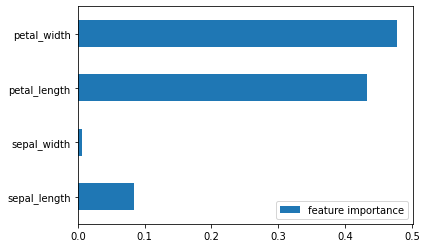

In [54]:
pd.DataFrame(data=best_clf.feature_importances_, index=X.columns, columns=['feature importance']).plot.barh()